# Team Gear5 - ADA 2024 Project  


**Authors:** Mahmoud Dokmak, Matthieu Borello, Loïc Domingos, Léo Bruneau, Bastien Armstrong

<hr style="clear:both">

## Part 1 - Combining the datasets

In [5]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#import warnings
#warnings.filterwarnings('ignore')
from openpyxl.styles.builtins import title
from scipy.stats import ttest_ind
from collections import Counter
from scipy.stats import chi2_contingency

In [3]:
def print_df_size(name, df):
	print(name, f"- shape: {df.shape} --> {df.shape[0]} rows and {df.shape[1]} columns")

In [4]:
data_movies = pd.read_csv('./data/MovieSummaries/movie.metadata.tsv', sep='\t', header=None)
print_df_size("data of movies", data_movies)

FileNotFoundError: [Errno 2] No such file or directory: './data/MovieSummaries/movie.metadata.tsv'

In [ ]:
data_movies[1]
print(type(data_movies[1].iloc[0]))
data_movies.head(10)

<class 'str'>


0           1                                                  2  \
0    975900   /m/03vyhn                                     Ghosts of Mars   
1   3196793   /m/08yl5d  Getting Away with Murder: The JonBenét Ramsey ...   
2  28463795  /m/0crgdbh                                        Brun bitter   
3   9363483  /m/0285_cd                                   White Of The Eye   
4    261236   /m/01mrr1                                  A Woman in Flames   
5  13696889  /m/03cfc81                                      The Gangsters   
6  18998739  /m/04jcqvw                          The Sorcerer's Apprentice   
7  10408933  /m/02qc0j7                           Alexander's Ragtime Band   
8   9997961  /m/06_y2j7                                     Contigo y aquí   
9   2345652   /m/075f66                                   City of the Dead   

            3           4      5  \
0  2001-08-24  14010832.0   98.0   
1  2000-02-16         NaN   95.0   
2        1988         NaN   83.0   
3        1987         NaN  110.0   
4        1983         NaN  106.0   
5  1913-05-29         NaN   35.0   
6        2002         NaN   86.0   
7  1938-08-16   3600000.0  106.0   
8        1974         NaN    NaN   
9        1960         NaN   76.0   

                                                   6  \
0                 {"/m/02h40lc": "English Language"}   
1                 {"/m/02h40lc": "English Language"}   
2                 {"/m/05f_3": "Norwegian Language"}   
3                 {"/m/02h40lc": "English Language"}   
4                  {"/m/04306rv": "German Language"}   
5  {"/m/06ppq": "Silent film", "/m/02h40lc": "Eng...   
6                 {"/m/02h40lc": "English Language"}   
7                 {"/m/02h40lc": "English Language"}   
8                   {"/m/06nm1": "Spanish Language"}   
9                 {"/m/02h40lc": "English Language"}   

                                           7  \
0  {"/m/09c7w0": "United States of America"}   
1  {"/m/09c7w0": "United States of America"}   
2                     {"/m/05b4w": "Norway"}   
3             {"/m/07ssc": "United Kingdom"}   
4                    {"/m/0345h": "Germany"}   
5  {"/m/09c7w0": "United States of America"}   
6               {"/m/0hzlz": "South Africa"}   
7  {"/m/09c7w0": "United States of America"}   
8                   {"/m/0jgd": "Argentina"}   
9             {"/m/07ssc": "United Kingdom"}   

                                                   8  
0  {"/m/01jfsb": "Thriller", "/m/06n90": "Science...  
1  {"/m/02n4kr": "Mystery", "/m/03bxz7": "Biograp...  
2  {"/m/0lsxr": "Crime Fiction", "/m/07s9rl0": "D...  
3  {"/m/01jfsb": "Thriller", "/m/0glj9q": "Erotic...  
4                            {"/m/07s9rl0": "Drama"}  
5  {"/m/02hmvc": "Short Film", "/m/06ppq": "Silen...  
6  {"/m/0hqxf": "Family Film", "/m/01hmnh": "Fant...  
7  {"/m/04t36": "Musical", "/m/01z4y": "Comedy", ...  
8  {"/m/04t36": "Musical", "/m/07s9rl0": "Drama",...  
9  {"/m/03npn": "Horror", "/m/0fdjb": "Supernatur...

In [ ]:
added_movies = pd.read_json('./data/movie_dataset_public_final/raw/metadata_updated.json', lines=True)
print_df_size("added movies", added_movies)

added movies - shape: (84661, 6) --> 84661 rows and 6 columns


In [ ]:
added_movies["imdbId"]
print(type(added_movies["imdbId"].iloc[0]))
added_movies.head(10)

<class 'numpy.int64'>


title       directedBy  \
0                    Toy Story (1995)    John Lasseter   
1                      Jumanji (1995)     Joe Johnston   
2             Grumpier Old Men (1995)    Howard Deutch   
3            Waiting to Exhale (1995)  Forest Whitaker   
4  Father of the Bride Part II (1995)    Charles Shyer   
5                         Heat (1995)     Michael Mann   
6                      Sabrina (1995)   Sydney Pollack   
7                 Tom and Huck (1995)     Peter Hewitt   
8                 Sudden Death (1995)      Peter Hyams   
9                    GoldenEye (1995)  Martin Campbell   

                                            starring  avgRating  imdbId  \
0  Tim Allen, Tom Hanks, Don Rickles, Jim Varney,...    3.89146  114709   
1  Jonathan Hyde, Bradley Pierce, Robin Williams,...    3.26605  113497   
2  Jack Lemmon, Walter Matthau, Ann-Margret , Sop...    3.17146  113228   
3  Angela Bassett, Loretta Devine, Whitney Housto...    2.86824  114885   
4  Steve Martin, Martin Short, Diane Keaton, Kimb...    3.07620  113041   
5  Robert De Niro, Al Pacino, Val Kilmer, Jon Voi...    3.85549  113277   
6  Harrison Ford, Greg Kinnear, Nancy Marchand, J...    3.37244  114319   
7  Jonathan Taylor Thomas, Brad Renfro, Eric Schw...    3.11678  112302   
8  Raymond J. Barry, Powers Boothe, Jean-Claude V...    3.00242  114576   
9  Pierce Brosnan, Sean Bean, Famke Janssen, Izab...    3.43340  113189   

   item_id  
0        1  
1        2  
2        3  
3        4  
4        5  
5        6  
6        7  
7        8  
8        9  
9       10

In [ ]:
added_movies["imdbId"] = added_movies["imdbId"].astype(str)
print(type(added_movies["imdbId"].iloc[0]))
added_movies.head(10)

<class 'str'>


title       directedBy  \
0                    Toy Story (1995)    John Lasseter   
1                      Jumanji (1995)     Joe Johnston   
2             Grumpier Old Men (1995)    Howard Deutch   
3            Waiting to Exhale (1995)  Forest Whitaker   
4  Father of the Bride Part II (1995)    Charles Shyer   
5                         Heat (1995)     Michael Mann   
6                      Sabrina (1995)   Sydney Pollack   
7                 Tom and Huck (1995)     Peter Hewitt   
8                 Sudden Death (1995)      Peter Hyams   
9                    GoldenEye (1995)  Martin Campbell   

                                            starring  avgRating  imdbId  \
0  Tim Allen, Tom Hanks, Don Rickles, Jim Varney,...    3.89146  114709   
1  Jonathan Hyde, Bradley Pierce, Robin Williams,...    3.26605  113497   
2  Jack Lemmon, Walter Matthau, Ann-Margret , Sop...    3.17146  113228   
3  Angela Bassett, Loretta Devine, Whitney Housto...    2.86824  114885   
4  Steve Martin, Martin Short, Diane Keaton, Kimb...    3.07620  113041   
5  Robert De Niro, Al Pacino, Val Kilmer, Jon Voi...    3.85549  113277   
6  Harrison Ford, Greg Kinnear, Nancy Marchand, J...    3.37244  114319   
7  Jonathan Taylor Thomas, Brad Renfro, Eric Schw...    3.11678  112302   
8  Raymond J. Barry, Powers Boothe, Jean-Claude V...    3.00242  114576   
9  Pierce Brosnan, Sean Bean, Famke Janssen, Izab...    3.43340  113189   

   item_id  
0        1  
1        2  
2        3  
3        4  
4        5  
5        6  
6        7  
7        8  
8        9  
9       10

In [ ]:
converter = pd.read_csv('./data/Converter/query.csv')
print_df_size("converter", converter)

converter - shape: (409064, 2) --> 409064 rows and 2 columns


In [ ]:
print(type(converter["imdb_id"].iloc[0]))
print(type(converter["freebase_id"].iloc[0]))
converter.head(10)

<class 'str'>
<class 'str'>


imdb_id freebase_id
0  nm0010930    /m/0282x
1  nm0124133   /m/09b6zr
2  nm0684496    /m/014d3
3  nm0061667    /m/01rgr
4  tt1675434  /m/0hgqwpj
5  nm0949918    /m/0m2l9
6  nm0180134    /m/0fyh4
7  nm0001789     /m/0hy8
8  nm0686817    /m/05qmj
9  nm0000658    /m/0h0wc

In [ ]:
converter["imdb_id"] = converter["imdb_id"].str[3:]
converter.head(10)

imdb_id freebase_id
0  010930    /m/0282x
1  124133   /m/09b6zr
2  684496    /m/014d3
3  061667    /m/01rgr
4  675434  /m/0hgqwpj
5  949918    /m/0m2l9
6  180134    /m/0fyh4
7  001789     /m/0hy8
8  686817    /m/05qmj
9  000658    /m/0h0wc

In [ ]:
merged_data = pd.merge(data_movies, converter, left_on=1, right_on="freebase_id", how='left')

data_movies['imdb_id'] = merged_data["imdb_id"]



In [ ]:
data_movies.head(20)

0           1                                                  2  \
0     975900   /m/03vyhn                                     Ghosts of Mars   
1    3196793   /m/08yl5d  Getting Away with Murder: The JonBenét Ramsey ...   
2   28463795  /m/0crgdbh                                        Brun bitter   
3    9363483  /m/0285_cd                                   White Of The Eye   
4     261236   /m/01mrr1                                  A Woman in Flames   
5   13696889  /m/03cfc81                                      The Gangsters   
6   18998739  /m/04jcqvw                          The Sorcerer's Apprentice   
7   10408933  /m/02qc0j7                           Alexander's Ragtime Band   
8    9997961  /m/06_y2j7                                     Contigo y aquí   
9    2345652   /m/075f66                                   City of the Dead   
10    175026   /m/017n1p                                      Sarah and Son   
11  24229100  /m/07kjkz6           Lady Snowblood 2: Love Song of Vengeance   
12   6631279   /m/0gffwj                                        Little city   
13    171005   /m/016ywb                                            Henry V   
14  18296435  /m/04cqrs4                                       Aaah Belinda   
15  11250635  /m/02r52hc                            The Mechanical Monsters   
16  30388930  /m/0g5qvzg                                               1919   
17     77856    /m/0kcn7                                       Mary Poppins   
18  32456683  /m/0gyryjt                           Die Fahne von Kriwoj Rog   
19  33420460  /m/0gj30jx                                    Keep the Change   

             3            4      5  \
0   2001-08-24   14010832.0   98.0   
1   2000-02-16          NaN   95.0   
2         1988          NaN   83.0   
3         1987          NaN  110.0   
4         1983          NaN  106.0   
5   1913-05-29          NaN   35.0   
6         2002          NaN   86.0   
7   1938-08-16    3600000.0  106.0   
8         1974          NaN    NaN   
9         1960          NaN   76.0   
10        1930          NaN   86.0   
11        1974          NaN   89.0   
12  1997-04-04          NaN   93.0   
13  1989-11-08   10161099.0  137.0   
14        1986          NaN    NaN   
15         NaN          NaN    NaN   
16        1984          NaN   99.0   
17  1964-08-27  102272727.0  139.0   
18        1967          NaN  108.0   
19        1992          NaN   97.0   

                                                    6  \
0                  {"/m/02h40lc": "English Language"}   
1                  {"/m/02h40lc": "English Language"}   
2                  {"/m/05f_3": "Norwegian Language"}   
3                  {"/m/02h40lc": "English Language"}   
4                   {"/m/04306rv": "German Language"}   
5   {"/m/06ppq": "Silent film", "/m/02h40lc": "Eng...   
6                  {"/m/02h40lc": "English Language"}   
7                  {"/m/02h40lc": "English Language"}   
8                    {"/m/06nm1": "Spanish Language"}   
9                  {"/m/02h40lc": "English Language"}   
10                 {"/m/02h40lc": "English Language"}   
11                  {"/m/03_9r": "Japanese Language"}   
12                 {"/m/02h40lc": "English Language"}   
13                 {"/m/02h40lc": "English Language"}   
14                 {"/m/02hwyss": "Turkish Language"}   
15                 {"/m/02h40lc": "English Language"}   
16                                                 {}   
17                 {"/m/02h40lc": "English Language"}   
18                  {"/m/04306rv": "German Language"}   
19                 {"/m/02h40lc": "English Language"}   

                                             7  \
0    {"/m/09c7w0": "United States of America"}   
1    {"/m/09c7w0": "United States of America"}   
2                       {"/m/05b4w": "Norway"}   
3               {"/m/07ssc": "United Kingdom"}   
4                      {"/m/0345h": "Germany"}   
5    {"/m/09c7w0": "United States of America"}   
6   

In [ ]:
final_data = pd.merge(data_movies, added_movies, left_on='imdb_id', right_on="imdbId", how='left')
final_data.head(20)

0           1                                                  2  \
0     975900   /m/03vyhn                                     Ghosts of Mars   
1    3196793   /m/08yl5d  Getting Away with Murder: The JonBenét Ramsey ...   
2   28463795  /m/0crgdbh                                        Brun bitter   
3    9363483  /m/0285_cd                                   White Of The Eye   
4     261236   /m/01mrr1                                  A Woman in Flames   
5   13696889  /m/03cfc81                                      The Gangsters   
6   18998739  /m/04jcqvw                          The Sorcerer's Apprentice   
7   10408933  /m/02qc0j7                           Alexander's Ragtime Band   
8    9997961  /m/06_y2j7                                     Contigo y aquí   
9    2345652   /m/075f66                                   City of the Dead   
10    175026   /m/017n1p                                      Sarah and Son   
11  24229100  /m/07kjkz6           Lady Snowblood 2: Love Song of Vengeance   
12   6631279   /m/0gffwj                                        Little city   
13    171005   /m/016ywb                                            Henry V   
14  18296435  /m/04cqrs4                                       Aaah Belinda   
15  11250635  /m/02r52hc                            The Mechanical Monsters   
16  30388930  /m/0g5qvzg                                               1919   
17     77856    /m/0kcn7                                       Mary Poppins   
18  32456683  /m/0gyryjt                           Die Fahne von Kriwoj Rog   
19  33420460  /m/0gj30jx                                    Keep the Change   

             3            4      5  \
0   2001-08-24   14010832.0   98.0   
1   2000-02-16          NaN   95.0   
2         1988          NaN   83.0   
3         1987          NaN  110.0   
4         1983          NaN  106.0   
5   1913-05-29          NaN   35.0   
6         2002          NaN   86.0   
7   1938-08-16    3600000.0  106.0   
8         1974          NaN    NaN   
9         1960          NaN   76.0   
10        1930          NaN   86.0   
11        1974          NaN   89.0   
12  1997-04-04          NaN   93.0   
13  1989-11-08   10161099.0  137.0   
14        1986          NaN    NaN   
15         NaN          NaN    NaN   
16        1984          NaN   99.0   
17  1964-08-27  102272727.0  139.0   
18        1967          NaN  108.0   
19        1992          NaN   97.0   

                                                    6  \
0                  {"/m/02h40lc": "English Language"}   
1                  {"/m/02h40lc": "English Language"}   
2                  {"/m/05f_3": "Norwegian Language"}   
3                  {"/m/02h40lc": "English Language"}   
4                   {"/m/04306rv": "German Language"}   
5   {"/m/06ppq": "Silent film", "/m/02h40lc": "Eng...   
6                  {"/m/02h40lc": "English Language"}   
7                  {"/m/02h40lc": "English Language"}   
8                    {"/m/06nm1": "Spanish Language"}   
9                  {"/m/02h40lc": "English Language"}   
10                 {"/m/02h40lc": "English Language"}   
11                  {"/m/03_9r": "Japanese Language"}   
12                 {"/m/02h40lc": "English Language"}   
13                 {"/m/02h40lc": "English Language"}   
14                 {"/m/02hwyss": "Turkish Language"}   
15                 {"/m/02h40lc": "English Language"}   
16                                                 {}   
17                 {"/m/02h40lc": "English Language"}   
18                  {"/m/04306rv": "German Language"}   
19                 {"/m/02h40lc": "English Language"}   

                                             7  \
0    {"/m/09c7w0": "United States of America"}   
1    {"/m/09c7w0": "United States of America"}   
2                       {"/m/05b4w": "Norway"}   
3               {"/m/07ssc": "United Kingdom"}   
4                      {"/m/0345h": "Germany"}   
5    {"/m/09c7w0": "United States of America"}   
6   

In [ ]:
filtered_final_data = final_data.dropna(subset=['imdbId'])
filtered_final_data.head(20)

0           1                                     2           3  \
0      975900   /m/03vyhn                        Ghosts of Mars  2001-08-24   
12    6631279   /m/0gffwj                           Little city  1997-04-04   
14   18296435  /m/04cqrs4                          Aaah Belinda        1986   
21     612710   /m/02wjqm                        New Rose Hotel  1999-10-01   
22   21926710  /m/05p45cv                         White on Rice        2009   
29     156558   /m/014k4y                              Baby Boy  2001-06-27   
38   26067101  /m/0b6c_nw                           Siam Sunset        1999   
45    2314463   /m/0734w5  Electric Apricot: Quest For Festeroo        2006   
46    2487170   /m/07h9zj                                Troops        1997   
47   25960460  /m/0b6kc_5                        Daddy and Them        2001   
53   12008535  /m/02vlsqt                          Rudo y Cursi        2008   
57   11633165  /m/02rm6l8                             Innocence        1997   
58   21449578  /m/05f6kpj                                Hamsun  1996-04-19   
60    5708633   /m/0f0d1p               The Great New Wonderful  2006-06-23   
69   12371532  /m/02w1jsk     Chasing Ghosts: Beyond the Arcade        2007   
96   24039457  /m/0crx1wl                 ZA: Zombies Anonymous        2005   
98    5894429   /m/0fc8w8                      Closing the Ring  2007-09-14   
101  27556929  /m/04j0jtp                         Deadly Voyage        1996   
102   4300418   /m/0bvx7h         The Hero: Love Story of a Spy  2003-04-11   
110   8669450  /m/027d9tv                         One Six Right  2005-11-25   

              4      5                                                  6  \
0    14010832.0   98.0                 {"/m/02h40lc": "English Language"}   
12          NaN   93.0                 {"/m/02h40lc": "English Language"}   
14          NaN    NaN                 {"/m/02hwyss": "Turkish Language"}   
21      21521.0   92.0                 {"/m/02h40lc": "English Language"}   
22          NaN   82.0                                                 {}   
29   29381649.0  123.0                 {"/m/02h40lc": "English Language"}   
38          NaN   91.0                                                 {}   
45          NaN   96.0                                                 {}   
46          NaN   10.0                 {"/m/02h40lc": "English Language"}   
47          NaN  101.0                 {"/m/02h40lc": "English Language"}   
53   11091868.0  103.0                   {"/m/06nm1": "Spanish Language"}   
57          NaN  110.0                 {"/m/02hwyss": "Turkish Language"}   
58          NaN  160.0  {"/m/02h40lc": "English Language", "/m/06mp7":...   
60     172055.0   87.0                 {"/m/02h40lc": "English Language"}   
69          NaN   90.0                 {"/m/02h40lc": "English Language"}   
96          NaN  118.0                 {"/m/02h40lc": "English Language"}   
98          NaN  117.0                 {"/m/02h40lc": "English Language"}   
101         NaN   90.0                 {"/m/02h40lc": "English Language"}   
102         NaN  182.0                     {"/m/03k50": "Hindi Language"}   
110         NaN   73.0                 {"/m/02h40lc": "English Language"}   

                                                     7  \
0            {"/m/09c7w0": "United States of America"}   
12           {"/m/09c7w0": "United States of America"}   
14                             {"/m/01znc_": "Turkey"}   
21           {"/m/09c7w0": "United States of America"}   
22           {"/m/09c7w0": "United States of America"}   
29           {"/m/09c7w0": "United States of America"}   
38   {"/m/0chghy": "Australia", "/m/0ctw_b": "New Z...   
45           {"/m/09c7w0": "United States of America"}   
46           {"/m/09c7w0": "United States of America"}   
47   {"/m/09c7w0": "United States of America", "/m/...   
53   {"/m/0b90_r": "Mexico", "/m/09c7w0": "United S...   
57                             {"/m/01

In [ ]:
print_df_size("final data", filtered_final_data)

final data - shape: (14770, 16) --> 14770 rows and 16 columns


In [ ]:
# Count the number of NaN values in the fourth column (index 3)
nan_count = filtered_final_data.iloc[:, 5].isna().sum()

# Print the count
print(nan_count)

3775


## Proof of concepts for the methods

In this section, we want to show simple examples of the methods we are going to use in our project to prove that they work. Of course, the cases we are going to be analyzing in the final project are going to be more complex then these examples, but this serves only as a proof of concept. 

### Part 1 - Change point analysis

### Part 2 - 

### Part 3 - Predictive models

The first model we test in the polynomial regression

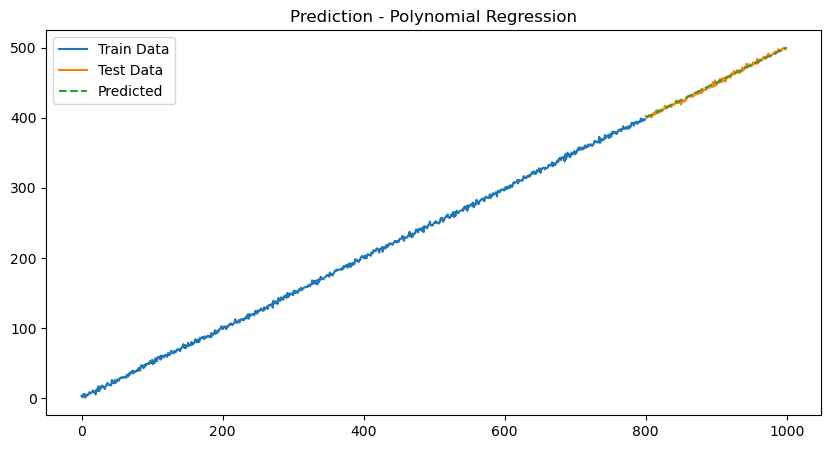

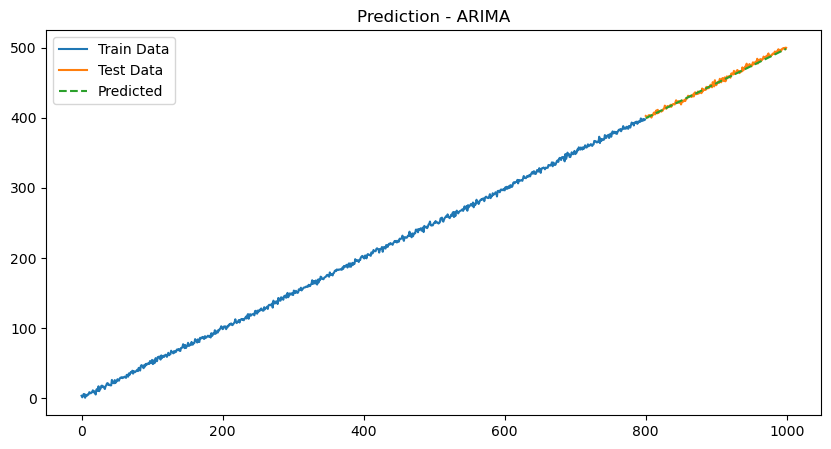

In [10]:
from tests.PolynomialRegression import polynomial_regression
from tests.ARIMA import arima
from src.utils.print_prediction import plot_results
import numpy as np
import pandas as pd


np.random.seed(0)
n = 1000
time_series = pd.Series(0.5 * np.arange(n) + np.sin(np.linspace(0, 20, n)) + np.random.normal(scale=2, size=n))
train, test = time_series[:800], time_series[800:]

poly_predictions = polynomial_regression(train, degree=3, n_forecast=len(test))
plot_results(train, test, poly_predictions, "Prediction - Polynomial Regression")

order = (50, 1, 50)  # (p,d,q)
# p is the number of previous points used to make the prediction
# d is the differentiating order to eliminate trends
# q is the moving average window

arima_predictions = arima(train, order=(2, 1, 2), n_forecast=len(test))
plot_results(train, test, arima_predictions, "Prediction - ARIMA")

One important thing to note is that the ARIMA model seem to be performing worse when the number of samples in the timeseries is smaller (See below). This could be an issue when using the year of release for movies. This problem might be resolved with a better initial choices of parameters for the model. However, if the issue persists, we might need to consider using the year and month for movie release to get more values in our timeseries.

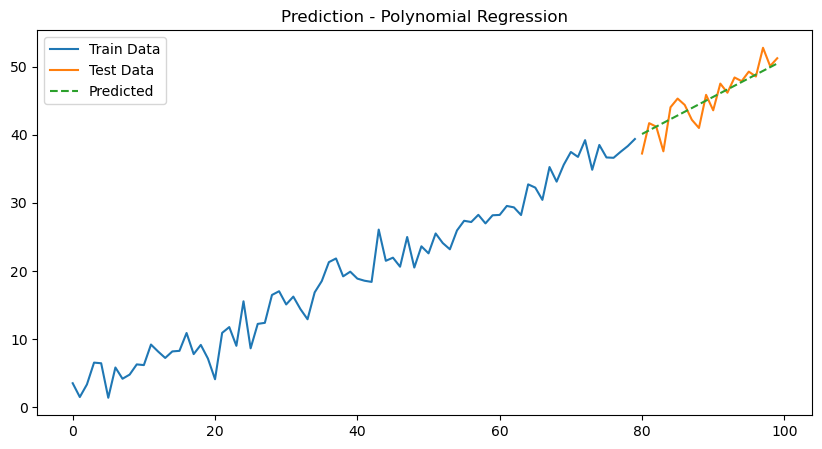

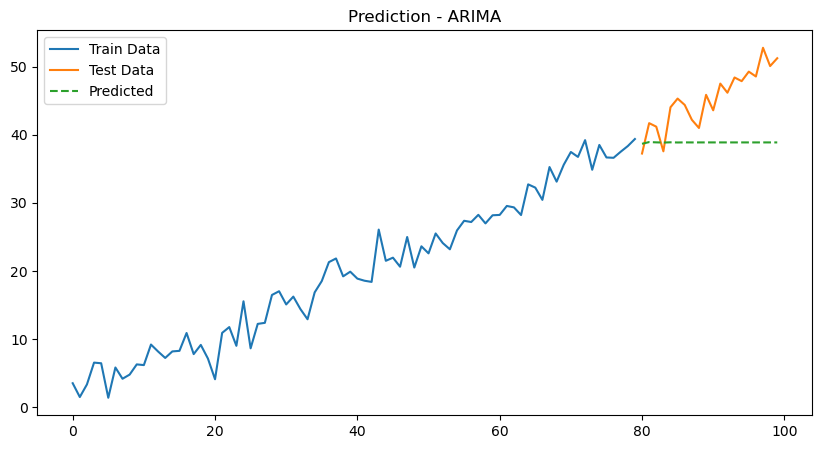

In [11]:
np.random.seed(0)
n = 100
time_series = pd.Series(0.5 * np.arange(n) + np.sin(np.linspace(0, 20, n)) + np.random.normal(scale=2, size=n))
train, test = time_series[:80], time_series[80:]

poly_predictions = polynomial_regression(train, degree=3, n_forecast=len(test))
plot_results(train, test, poly_predictions, "Prediction - Polynomial Regression")

order = (20, 1, 20) 

arima_predictions = arima(train, order=(2, 1, 2), n_forecast=len(test))
plot_results(train, test, arima_predictions, "Prediction - ARIMA")